In [6]:
import kagglehub
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

Using Colab cache for faster access to the 'housesalesprediction' dataset.


In [7]:
import pandas as pd
import numpy as np
import os

print(path)
print(os.listdir(path))


/kaggle/input/housesalesprediction
['kc_house_data.csv']


In [8]:
data = pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Interpreting Numbers

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = data[["sqft_living"]]
Y = data['price']
model.fit(X,Y)

LinearRegression()

In [10]:
print(model.coef_) #weight
print(model.intercept_) #bias

[280.6235679]
-43580.74309447396


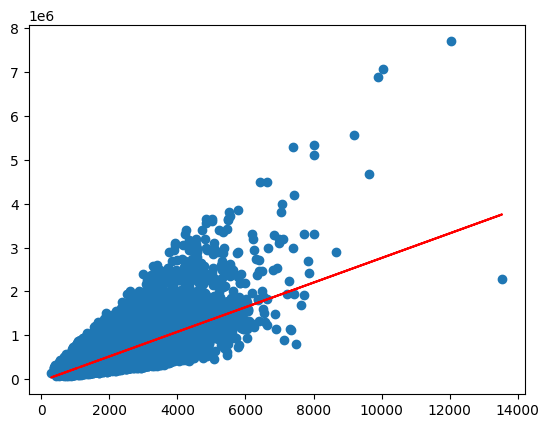

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.plot(X,model.predict(X),color='red')
plt.show()

# Not-so-linear regression - Interpreting polynomial complexities
*polynomial* complexities can be increased to capture complexities.
Drawback: it will be global.

Coefficients: [3.85812609e-02 6.79940947e+01]
Intercept: 199222.2793054846


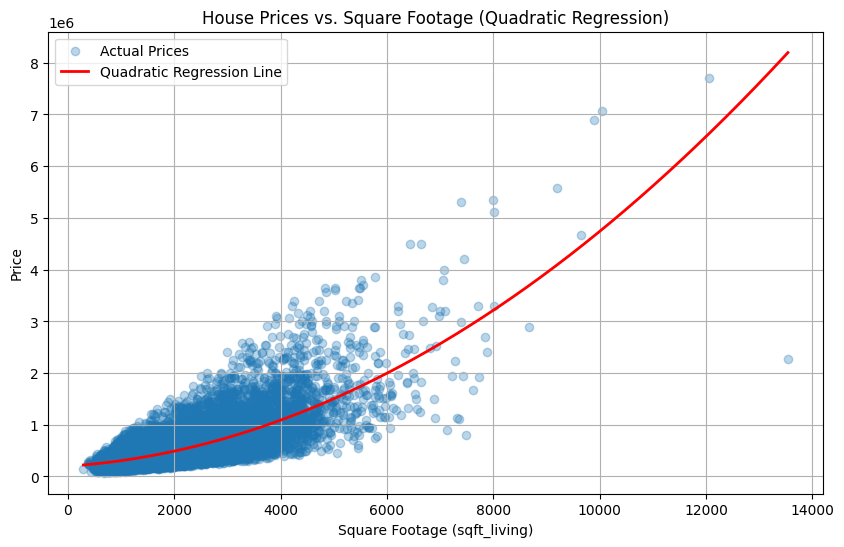

In [12]:
data['sqft_living_squared'] = data['sqft_living']**2
x = data[["sqft_living_squared","sqft_living"]]
y = data["price"]
model.fit(x,y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
# Fix plt.scatter to use the original sqft_living for the x-axis
plt.scatter(data['sqft_living'], y, alpha=0.3, label='Actual Prices')

# Generate values for plotting the quadratic regression line
x_plot = pd.DataFrame({
    'sqft_living': np.linspace(data['sqft_living'].min(), data['sqft_living'].max(), 500)
})
x_plot['sqft_living_squared'] = x_plot['sqft_living']**2
x_plot = x_plot[['sqft_living_squared', 'sqft_living']] # Ensure column order matches model training

y_pred_plot = model.predict(x_plot)

plt.plot(x_plot['sqft_living'], y_pred_plot, color='red', linewidth=2, label='Quadratic Regression Line')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.title('House Prices vs. Square Footage (Quadratic Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Let's Train it. And will improve to optimize it.

Linear Regression - Single Feature

In [13]:
X= data[['sqft_living']]
Y = data['price']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.49406905389089006

# Let's do all features (Multiple regression)

In [16]:
data = data.drop(columns=['date','sqft_living_squared'])
X = data.drop(columns=['price'])
Y = data['price']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
model.score(X_test, Y_test)

0.7012448735876462

# Feature Scaling
Standarzing/normalizing the features - to get them on the same scale

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['number'])
X_scaled = scaler.fit_transform(X_numeric)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [22]:
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.7012448735876723

# Checking Correlation
default is Pearson

In [23]:
data.corr()['price'].sort_values(ascending=False)


,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [24]:
important_features = [
    'sqft_living',
    'grade',
    'sqft_above',
    'sqft_living15',
    'bathrooms',
    'view',
    'sqft_basement',
    'bedrooms',
    'lat',
    'waterfront',
    'floors',
    'yr_renovated'
]

Xf = data[important_features]
Yf = data['price']


In [25]:
Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(Xf, Y, test_size=0.2, random_state=42)
model.fit(Xf_train, Yf_train)
model.score(Xf_test, Yf_test)

0.6643982955642814

This suggests that some of the features initially retained (even if not highly correlated) contributed to the model's predictive power. One might consider exploring feature engineering,
different feature selection techniques, or more advanced models to optimize performance.

# Trying polynomial features (prices are rarely linear)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_test = poly.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_poly, Y, test_size=0.2, random_state=42
)

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.5004001394343451

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Exclude 'id' and 'zipcode' from the features used for polynomial transformation
X_for_poly = data.drop(columns=['price', 'id', 'zipcode'])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_for_poly)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_poly, Y, test_size=0.2, random_state=42
)

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.7598044760382243

# Ridge, Lasso, ElasticNet - Regularization

Applying Ridge Regularization - Penalized large coefficients but not zero

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Exclude 'id' and 'zipcode' from the features used for polynomial transformation
X_for_poly_ridge = data.drop(columns=['price', 'id', 'zipcode'])

# Apply Polynomial Features
poly_ridge = PolynomialFeatures(degree=2)
X_poly_ridge = poly_ridge.fit_transform(X_for_poly_ridge)

# Scale the polynomial features
scaler_ridge = StandardScaler()
X_poly_scaled_ridge = scaler_ridge.fit_transform(X_poly_ridge)

# Split the data into training and testing sets
X_train_ridge, X_test_ridge, Y_train_ridge, Y_test_ridge = train_test_split(
    X_poly_scaled_ridge, Y, test_size=0.2, random_state=42
)

# Train a Ridge Regression model
ridge_model = Ridge(alpha=500) # alpha is the regularization strength
ridge_model.fit(X_train_ridge, Y_train_ridge)

# Evaluate the Ridge Regression model
ridge_score = ridge_model.score(X_test_ridge, Y_test_ridge)
print(f"Ridge Regression score (with scaled polynomial features): {ridge_score}")

Ridge Regression score (with scaled polynomial features): 0.742919014135625


Applying Lasso Regression
Lasso (L1 regularization) can shrink some coefficients to exactly zero, performing feature selection.

In [29]:
from sklearn.linear_model import Lasso

# Prepare data (same as Ridge)
X_for_poly_lasso = data.drop(columns=['price', 'id', 'zipcode'])

poly_lasso = PolynomialFeatures(degree=2)
X_poly_lasso = poly_lasso.fit_transform(X_for_poly_lasso)

scaler_lasso = StandardScaler()
X_poly_scaled_lasso = scaler_lasso.fit_transform(X_poly_lasso)

X_train_lasso, X_test_lasso, Y_train_lasso, Y_test_lasso = train_test_split(
    X_poly_scaled_lasso, Y, test_size=0.2, random_state=42
)

# Train Lasso Regression model
lasso_model = Lasso(alpha=100)  # alpha controls the regularization strength
lasso_model.fit(X_train_lasso, Y_train_lasso)

# Evaluate Lasso Regression model
lasso_score = lasso_model.score(X_test_lasso, Y_test_lasso)
print(f"Lasso Regression score (with scaled polynomial features): {lasso_score}")

# Count how many features were shrunk to zero (feature selection)
num_zero_coef = (lasso_model.coef_ == 0).sum()
print(f"Number of features shrunk to zero: {num_zero_coef} out of {len(lasso_model.coef_)}")

Lasso Regression score (with scaled polynomial features): 0.7478645687919552
Number of features shrunk to zero: 59 out of 171


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.326e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


# Applying Elastic Net
Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization, providing benefits of both approaches.

In [30]:
from sklearn.linear_model import ElasticNet

# Prepare data (same as Ridge and Lasso)
X_for_poly_en = data.drop(columns=['price', 'id', 'zipcode'])

poly_en = PolynomialFeatures(degree=2)
X_poly_en = poly_en.fit_transform(X_for_poly_en)

scaler_en = StandardScaler()
X_poly_scaled_en = scaler_en.fit_transform(X_poly_en)

X_train_en, X_test_en, Y_train_en, Y_test_en = train_test_split(
    X_poly_scaled_en, Y, test_size=0.2, random_state=42
)

# Train Elastic Net model
# alpha is the regularization strength, l1_ratio controls the mix (0 = Ridge, 1 = Lasso)
elastic_net_model = ElasticNet(alpha=100, l1_ratio=0.5)
elastic_net_model.fit(X_train_en, Y_train_en)

# Evaluate Elastic Net model
en_score = elastic_net_model.score(X_test_en, Y_test_en)
print(f"Elastic Net score (with scaled polynomial features): {en_score}")

# Count how many features were shrunk to zero
num_zero_coef_en = (elastic_net_model.coef_ == 0).sum()
print(f"Number of features shrunk to zero: {num_zero_coef_en} out of {len(elastic_net_model.coef_)}")

Elastic Net score (with scaled polynomial features): 0.43512868489138146
Number of features shrunk to zero: 1 out of 171


# Comparing All Regularization Methods
Let's compare Linear, Ridge, Lasso, and Elastic Net models side by side.

In [31]:
import pandas as pd

# Create a comparison dataframe
comparison_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net'],
    'R² Score': [
        model.score(X_test_ridge, Y_test_ridge),  # Using previous linear model test set
        ridge_score,
        lasso_score,
        en_score
    ],
    'Features Eliminated': [
        '0',
        '0',
        f'{num_zero_coef}',
        f'{num_zero_coef_en}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison:")
print(comparison_df.to_string(index=False))

Model Comparison:
            Model     R² Score Features Eliminated
Linear Regression -2662.409446                   0
 Ridge Regression     0.742919                   0
 Lasso Regression     0.747865                  59
      Elastic Net     0.435129                   1


Ridge: Best for handling multicollinearity, keeps all features
Lasso: Performs automatic feature selection by shrinking coefficients to zero
Elastic Net: Balances Ridge and Lasso benefits
Choose based on your goal:
  - If you need interpretability: Lasso or Elastic Net
  - If you have correlated features: Ridge
  - If unsure: Elastic Net combines both strengths

# Model Evaluation
R-squared is useful, but let's look at the error in actual dollars using MAE and RMSE.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Using the Ridge model predictions from the previous step
Y_pred = ridge_model.predict(X_test_ridge)

mae = mean_absolute_error(Y_test_ridge, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test_ridge, Y_pred))

print(f'Mean Absolute Error: ${mae:,.2f}')
print(f'Root Mean Squared Error: ${rmse:,.2f}')

Mean Absolute Error: $116,006.28
Root Mean Squared Error: $197,141.21


# Assumption Checking (Residual Analysis)
Linear Regression assumes that errors (residuals) are normally distributed and variance is constant (homoscedasticity).

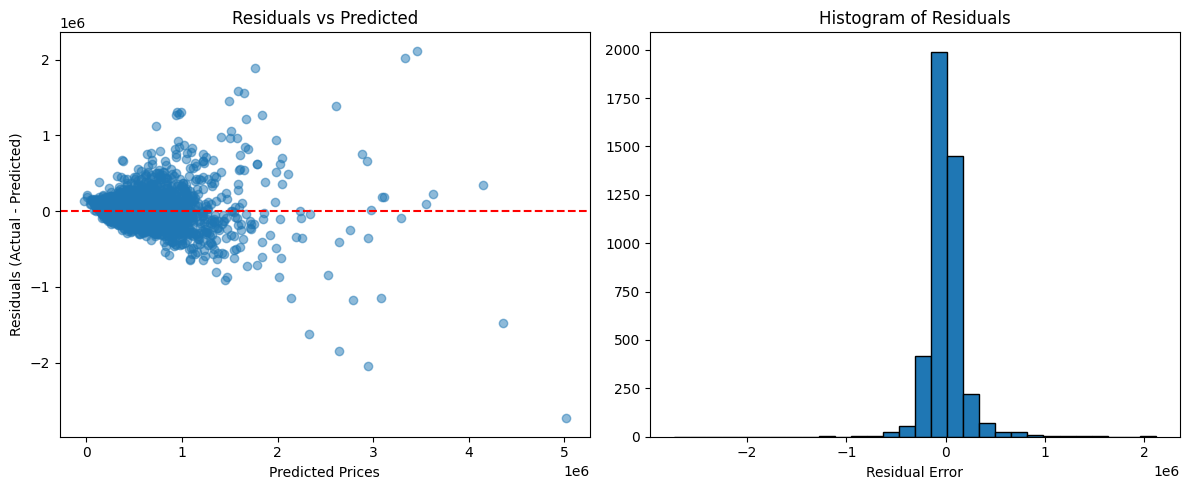

In [33]:
residuals = Y_test_ridge - Y_pred

plt.figure(figsize=(12, 5))

# Plot 1: Residuals vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted')

# Plot 2: Histogram of Residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual Error')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# Cross-Validation
Checking if our model performance is stable across different subsets of data (5-Fold CV).

In [34]:
from sklearn.model_selection import cross_val_score

# We use the scaled polynomial features (X_poly_scaled_ridge) and the full target (Y)
scores = cross_val_score(ridge_model, X_poly_scaled_ridge, Y, cv=5, scoring='r2')

print(f'Cross-Validation Scores: {scores}')
print(f'Average R^2 Score: {scores.mean():.4f}')
print(f'Standard Deviation: {scores.std():.4f}')

Cross-Validation Scores: [0.77485031 0.77293116 0.75650461 0.75157174 0.73189916]
Average R^2 Score: 0.7576
Standard Deviation: 0.0157


# As always, GridSearchCV can be used to find the best parameters for the model.